In [59]:
#importing required modules
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#importing dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [61]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
#checking for null values
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [64]:
#Exploratory data analysis
dataset.shape

(200, 5)

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [67]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

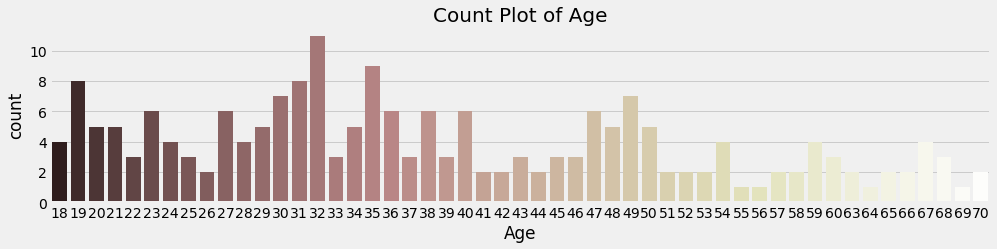

In [68]:
#count plot of age
plt.rcParams['figure.figsize'] = (15, 3)
sns.countplot(dataset['Age'], palette = 'pink')
plt.title('Count Plot of Age', fontsize = 20)
plt.show()

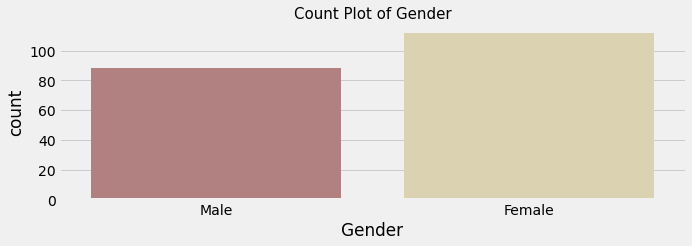

In [69]:
#count plot of gender
plt.rcParams['figure.figsize'] = (10, 3)
sns.countplot(dataset['Gender'], palette = 'pink')
plt.title('Count Plot of Gender', fontsize = 15)
plt.show()

In [70]:
#definimg scatter plot function
def scatters(col1,col2):
    fig = px.scatter(dataset, x=col1, y=col2 , color="Gender")
    return fig.show()

In [71]:
scatters('Annual Income (k$)', 'Spending Score (1-100)')

In [72]:
scatters('Age', 'Spending Score (1-100)')

In [73]:
scatters('Age', 'Annual Income (k$)')

In [74]:
#defining kde_plot plot function
def kde_plot(feature):
    grid = sns.FacetGrid(dataset,aspect=4)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

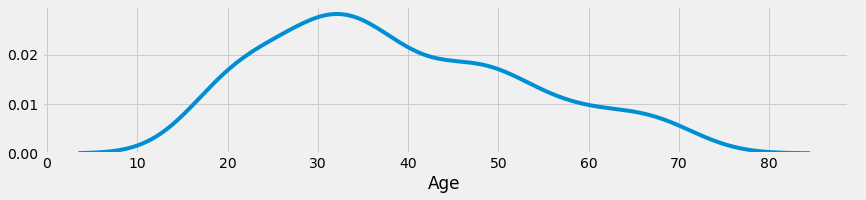

In [75]:
kde_plot('Age')

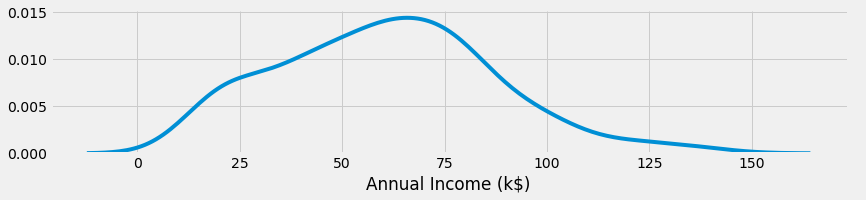

In [76]:
kde_plot('Annual Income (k$)')

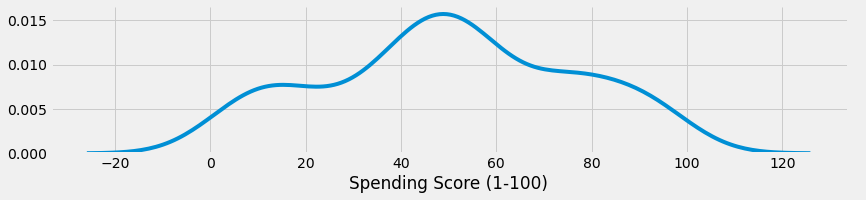

In [77]:
kde_plot('Spending Score (1-100)')

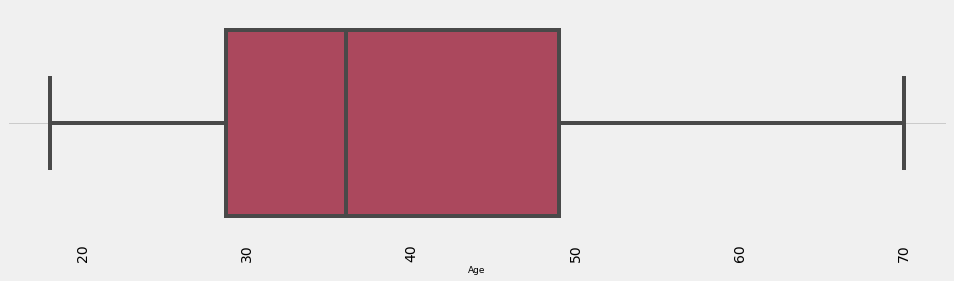

In [78]:
#checking for outliers
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['Age'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Age', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

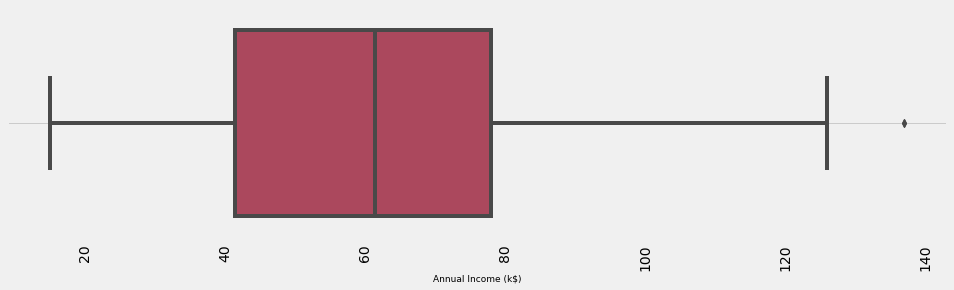

In [79]:
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['Annual Income (k$)'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Annual Income (k$)', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

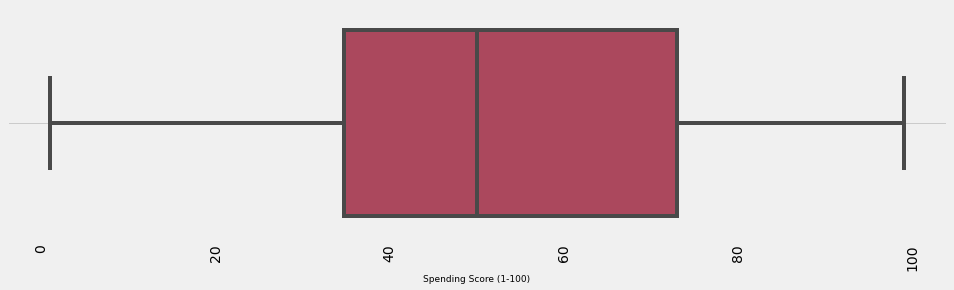

In [80]:
plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxplot(x = dataset['Spending Score (1-100)'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Spending Score (1-100)', fontsize = 9)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [81]:
#kmeans clustering using `Annual Income (k$)`and `Spending Score` columns
#importing dataset
X = dataset.iloc[:, [3, 4]].values

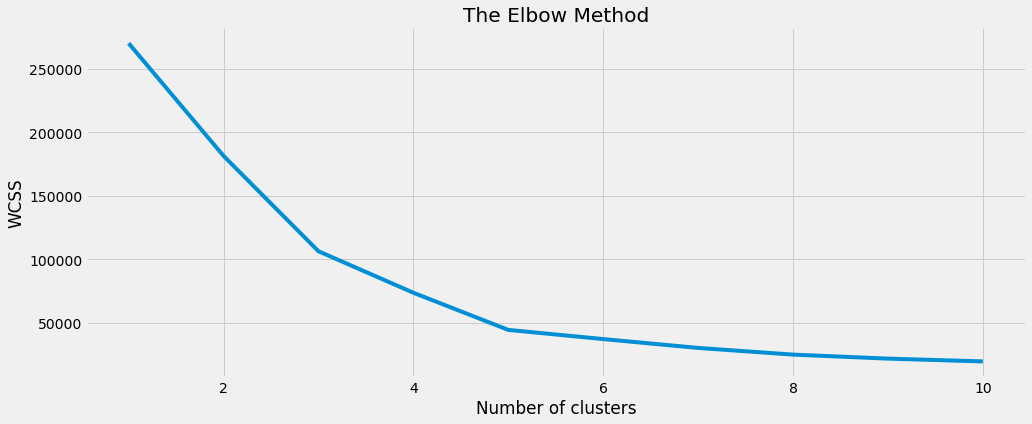

In [82]:
#using elbow method to find optimal no. of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
#training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

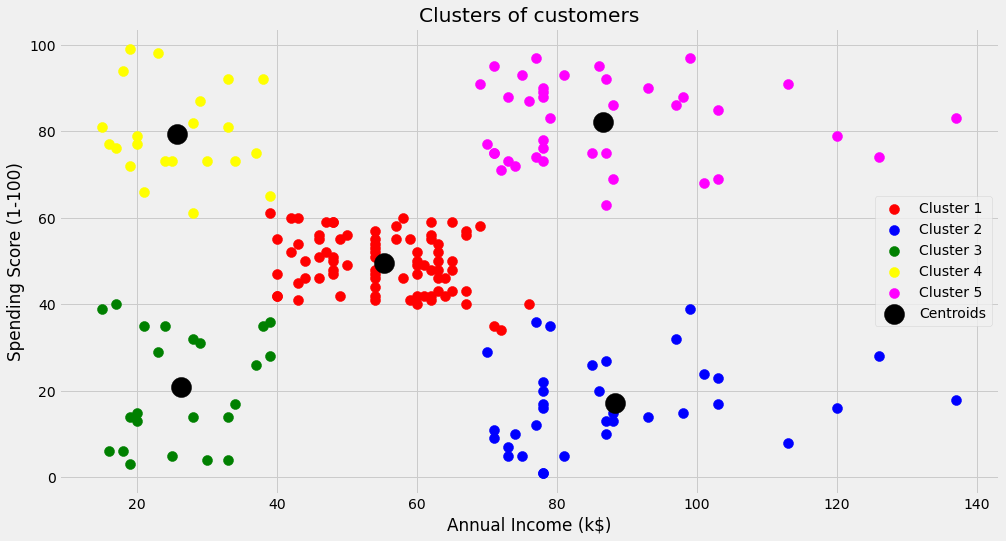

In [84]:
#visualising the clusters
plt.figure(1 , figsize = (15 ,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [85]:
#kmeans clustering using Age and Spending Score columns
Z = dataset.loc[:, ['Age', 'Spending Score (1-100)']].values

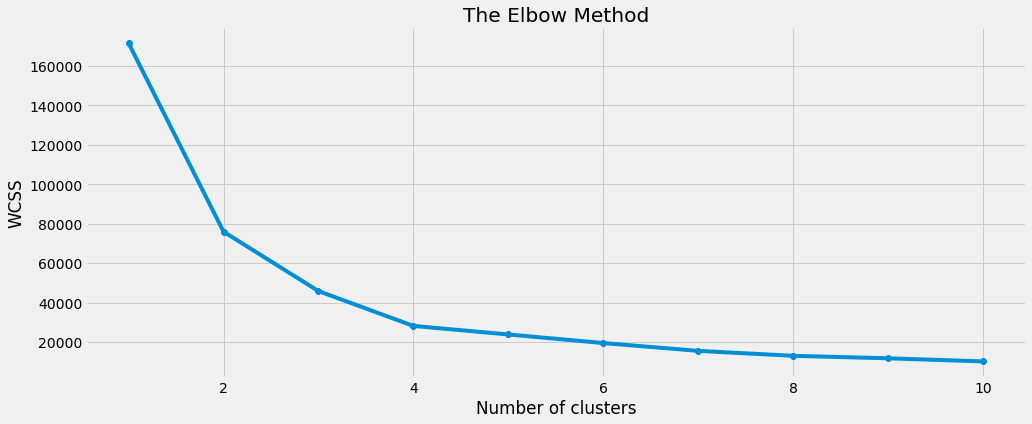

In [86]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [87]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)

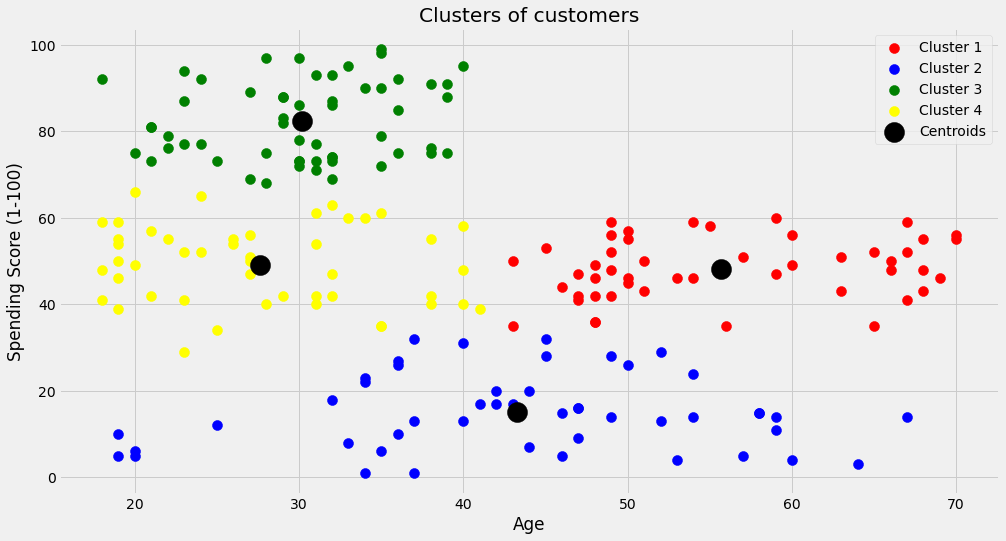

In [88]:
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [89]:
#kmeans clustering using `Age` and `Annual Income (k$)` columns
Y = dataset.loc[:, ['Age', 'Annual Income (k$)']].values

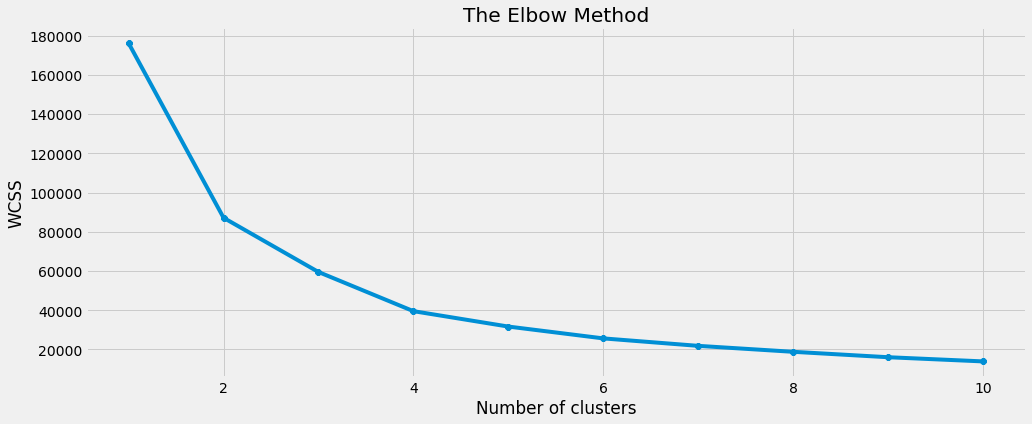

In [90]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

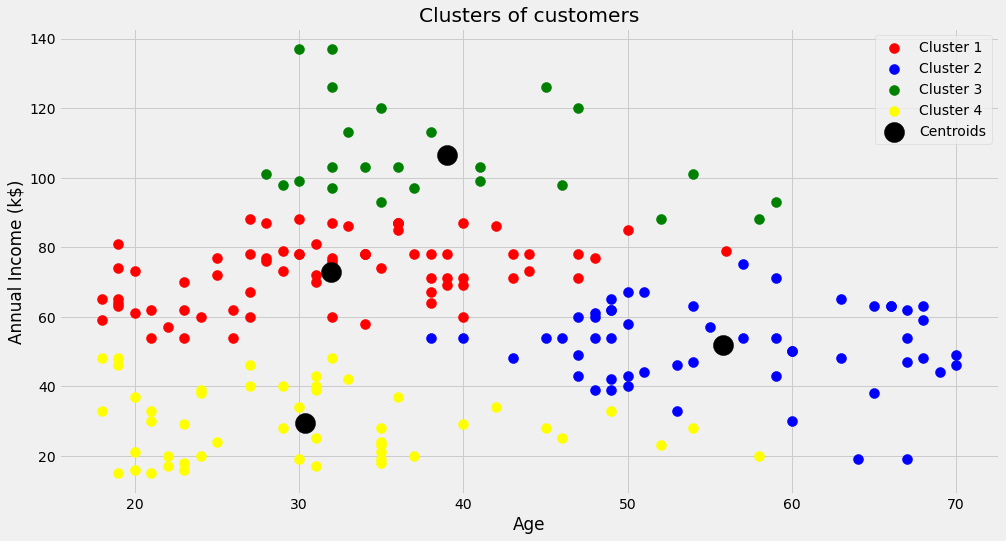

In [92]:
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

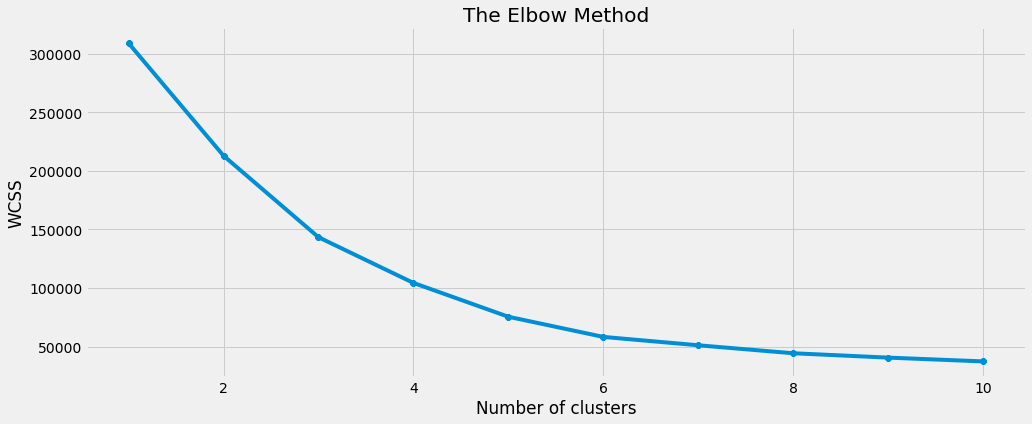

In [93]:
#Segmentation using`Age` , `Annual Income` and `Spending Score`
A = dataset.iloc[:, 2:]
wcss = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(A)
    wcss.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1, 11), wcss , marker = '8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [94]:
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(A)
A['label'] = clusters

In [95]:
fig = px.scatter_3d(A, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'label', size = 'label')
fig.show()